# Title: Analysis of Resting Blood Pressure (mm Hg) and Maximum Heart Rate (bpm) for Heart Disease Severity Classification

# Introduction

For my final project, I will be using a modified version of the UCI Heart Disease dataset, specifically focusing on the Cleveland database. The UCI Heart Disease dataset includes data from four sources: Cleveland, Hungary, Switzerland, and the VA Long Beach. The Cleveland database used to predict heart disease is chosen due to its sufficient number of observations. Heart disease is a major global health concern and responsible for a significant portion of deaths worldwide. Early detection and accurate classification of heart disease are vital for effective treatment. Additionally, the ability to predict the severity of heart disease can help healthcare professionals prioritize interventions and provide the ideal treatments to individual patients' needs. The Heart Disease Cleveland dataframe includes the variables: "trestbps" and "thalach", which I will be using to predict our variable of interest: "num". In this dataframe, "trestbps" refers to the "resting blood pressure (mm Hg)" on admission to the hospital, while "thalach" refers to "maximum heart rate achieved (beats per minute, bpm)", and "num" means the diagnosis of heart disease with a value of: 0 means no heart disease, 1-4 means the levels of heart disease[1]. I would classify levels of heart disease as 1 and 2 = Moderate, 3 and 4 = Life threatening[2]. In this way, it would more easier to manipulate the data. With these resources, I will be answering the question: Can we classify the extent of heart disease using resting blood pressure and maximum heart rate achieved?

[1]: Source from Piazza question @555

[2]: For the levels of heart disease, I refer to the document https://www.rigshospitalet.dk/afdelinger-og-klinikker/kraeft-og-organsygdomme/blodsygdomme/forskning/forsoegsbehandling/Documents/Lymfomer/Triangle/Triangle-SAE.pdf

# Methods and Results:

The dataset would be loaded into my jupyter notebook using the function of read.table() in R so that I can easily manipulate and tidy the data. Also, the variables would be change from character to factor or integer or numeric according to the orginal dataset. The data analysis will utilize the "trestbps," "thalach," and "num" columns, which represent resting blood pressure (mm Hg), maximum heart rate achieved (bpm), and the diagnosis of heart disease, respectively. This analysis aims to understand how different maximum heart rates and resting blood pressure levels correlate with various diagnoses of heart disease. 

The prediction would be measured based on a classification model. Both predictor variables are quantitative for predicting the categorial class. The classification would be done with the application of k nearest neighbor algorithm as it does not require any specific shape assumption for the algorithm to perform well. I would split the dataset into training and testing sets. The optimal number of neighbors would be found by using the training dataset to train the k-NN model on the training data using different values of k to find the optimal number of neighbors. Additionally, I would evaluate the model performance using cross-validation to ensure it generalizes well to unseen data. Lastly, I would use the classifier, trained by the training set, to classify the heart disease diagnoses in the testing data. Then, I would perform a metrics from the predicted testing set to obtain the information of accuracy, precision, and recall of that classifier by analyzing the confusion matrix to understand the model's performance in predicting each class of heart disease.

To visualize the result, a scatter plot would be used with the standardized variables to make sure the classifier would not treat one of the variables more important than the other. Each type of heart disease diagnosis would be labeled with different colors for clear identification.

# This step is to load the packages I need to use to tidy the dataset:

In [38]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

# Loading Data from the original source

In [2]:
# I got this link from the githut shared in the final project assignement, where I clicked on the folder containg the heart disease data, and click on the raw option that
# brought me to a new page with a new link, where all of the columns and rows of the data were.
# After that, I copied the new link and assigned it to url
url <- "https://raw.githubusercontent.com/UBC-DSCI/dsci-100-project_template/main/data/heart_disease/processed.cleveland.data"

# Using the read_csv and assigning col_names = FALSE functions to read the data frame that contains no column names.
cleveland_data <- read_csv(url, col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Data Wrangling:

In [37]:
# First, assign the column names of each column based on the UCI Website:
# https://archive.ics.uci.edu/dataset/45/heart+disease
colnames(cleveland_data) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 
                              'thalach','exang','oldpeak','slope','ca','thal','num')

# This second step is to mutate the variables so that all of the columns/variables have the correct type according
# to the wedsite that the original dataset comes from
cleveland_clean <- cleveland_data |> mutate(age = as.numeric(age), sex = as_factor(sex), cp = as_factor(cp),
                                            trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as_factor(fbs),
                                            restcg = as_factor(restcg), thalach = as.numeric(thalach), exang = as_factor(exang),
                                            oldpeak = as.numeric(oldpeak), slope = as.numeric(slope), ca = as.numeric(ca),
                                            thal = as_factor(thal), num = as.factor(num)) |>

# This third step is to change gender/sex into words (male and female) instead of numbers (1 and 0) to make the data more readable 
# to readers using the functions of mutate and fct_recode
                                     mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),

# This fourth step is to change the level of heart disease representing by numbers to a more readable description of the heart disease 
# diagnose using the functions of mutate and fct_recode

                                            num = case_when(
                                                                num == "0" ~ "No heart disease",
                                                                    num %in% c("1", "2") ~ "Moderate",
                                                                    num %in% c("3", "4") ~ "Life threatening",
                                           )) |>
    mutate(num = as_factor(num)) |>
                                            # num = fct_recode(num, "No heart disease" = "0", "Mild"="1", "Moderate" = "2",
                                            #                  "Serious" = "3", "Life threatening" = "4")) |>

# This fifth step is to use the function drop_na() to remove rows containing missing (NA) values from a data frame.
                                                                 drop_na()
cleveland_clean 

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,male,1,145,233,1,2,150,0,2.3,3,0,6.0,No heart disease
67,male,4,160,286,0,2,108,1,1.5,2,3,3.0,Moderate
67,male,4,120,229,0,2,129,1,2.6,2,2,7.0,Moderate
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,male,4,144,193,1,0,141,0,3.4,2,2,7.0,Moderate
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,Life threatening
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,Moderate


# Splitting data

In [35]:
# Set.seed is used to initialize to make randomization reproducible to ensure that the same random values are produced each time you run the code.
set.seed(2004)

# Select columns for easier data analysis: trestbps, thalach, num
cleveland_select <- cleveland_clean |> select(trestbps, thalach, num)

# Split the dataset into 75% of the original data into training set and the 25% into testing set
cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

cleveland_train

trestbps,thalach,num
<dbl>,<dbl>,<fct>
120,129,Mild
140,155,Mild
110,168,Mild
⋮,⋮,⋮
128,130,Serious
114,140,Life threatening
164,90,Serious


# Plotting out a scatter plot using our unscaled and unstandarized training data:

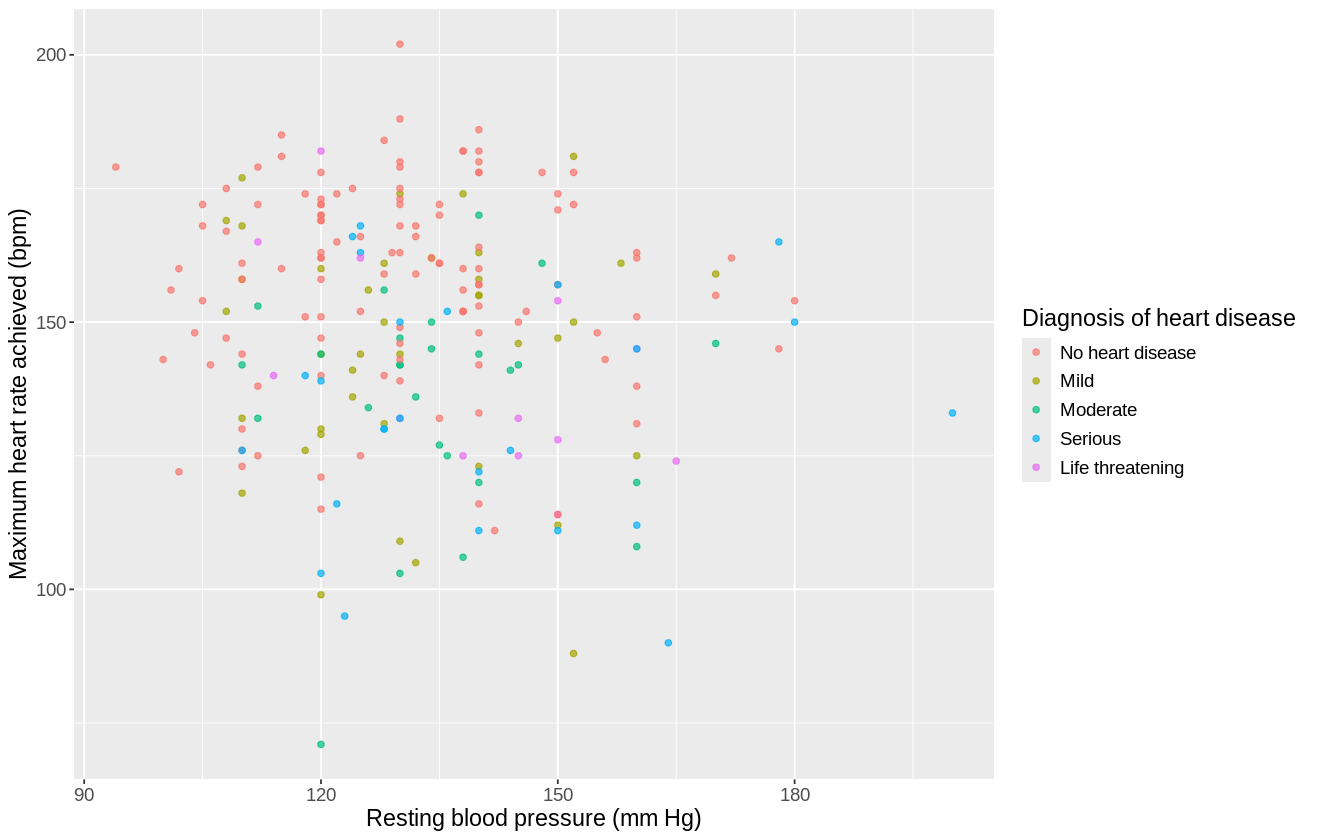

In [36]:
# This limits the width and height of the scatter plot
options(repr.plot.width = 11, repr.plot.height = 7)


cleveland_train_plot <- cleveland_train |>
                        ggplot(aes(x = trestbps , y = thalach , color = num)) +
                        geom_point(alpha = 0.7) +
                        labs(x = "Resting blood pressure (mm Hg)",y = "Maximum heart rate achieved (bpm)", 
                             color = "Diagnosis of heart disease") +
                        theme(text = element_text(size = 14))

cleveland_train_plot


# Finding the optimal K value for my k-nn classification model :

# Making the recipe:

In [19]:
# First, I make the recipe with the training data, containing the response variable,"num" (Diagnosis of heart disease), and 
# two predictors, "trestbps" (Resting blood pressure (mm Hg)) and "thalach" (Maximum heart rate achieved (bpm)).
heart_diagnosis_recipe <- recipe(num ~ trestbps + thalach, data =  cleveland_train) |>
# Second, this step is very important when dealing with k-nn classification is to standardize and center all predictors so that one would be matter more than the others.
# This step would be using the function step_scale and step_center functions to the standardization.
    step_scale(all_predictors()) |>
    step_center(all_predictors())
heart_diagnosis_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



# Making a testing model specification for K-nn classification

In [20]:
#First of all, I need to create a model specification for the K-nn classification by using the nearest_neighbor function and assigning the weight_func = rectangular
#so that each of the K-nearest neighbors gets exactly 1 vote and I randomly pick a number for neighbor = 8 so that I can use this later for cross-validation.
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 8) |>

#After that, I would need to specify which package or system will be used for training the model. In this case, using the set_engine function.
    set_engine("kknn") |>

#Finally, I specify that this is a classification problem with the set_mode function.
    set_mode("classification")
heart_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 8
  weight_func = rectangular

Computational engine: kknn 


# Doing cross-validation on the training data

In [21]:
set.seed(2004)
# set the strata argument to the categorical label variable
heart_vfold <- vfold_cv(cleveland_train, v = 10, strata = num)

train_workflow <- workflow() |>
    add_recipe(heart_diagnosis_recipe) |>
    add_model(heart_spec) |>
    fit_resamples(resamples = heart_vfold) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
train_workflow

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.5311312,10,0.02403534,Preprocessor1_Model1


In this case, having an accuracy of only 50.30% is pretty low. But, that is not a big problem.

# Making the model specification for K-nn classification

In [22]:
#First of all, I need to create a model specification for the K-nn classification by using the nearest_neighbor function and assigning the weight_func = rectangular
#so that each of the K-nearest neighbors gets exactly 1 vote and neighbor = tune() so that we can use this to find the optimal value for K.
heart_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>

#After that, I would need to specify which package or system will be used for training the model. In this case, using the set_engine function.
    set_engine("kknn") |>

#Finally, I specify that this is a classification problem with the set_mode function.
    set_mode("classification")

# Making the workflow to find out the optimal value for k

In [23]:
# In this step, I create a set of number to be used to test and find the optimal K value for the classification model.
# Using the tibble function to make it into a data frame and seq function to create a sequence of numbers from 1 to 30 and increases each time by 1.
k_values <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# In the next step, I would be making the workflow using the function workflow that contains 
# the heart_diagnosis_recipe using the function add_recipe and heart_spec using the add_model function.
knn_optimal_values <- workflow () |>
    add_recipe(heart_diagnosis_recipe) |>
    add_model(heart_spec_tune) |>
    tune_grid(resamples = heart_vfold, grid = k_values) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
knn_optimal_values

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.4593544,10,0.04590809,Preprocessor1_Model01
2,accuracy,multiclass,0.4637022,10,0.04765236,Preprocessor1_Model02
3,accuracy,multiclass,0.5230849,10,0.03909398,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,multiclass,0.5706569,10,0.02814313,Preprocessor1_Model28
29,accuracy,multiclass,0.5665255,10,0.02393248,Preprocessor1_Model29
30,accuracy,multiclass,0.5669396,10,0.02517496,Preprocessor1_Model30


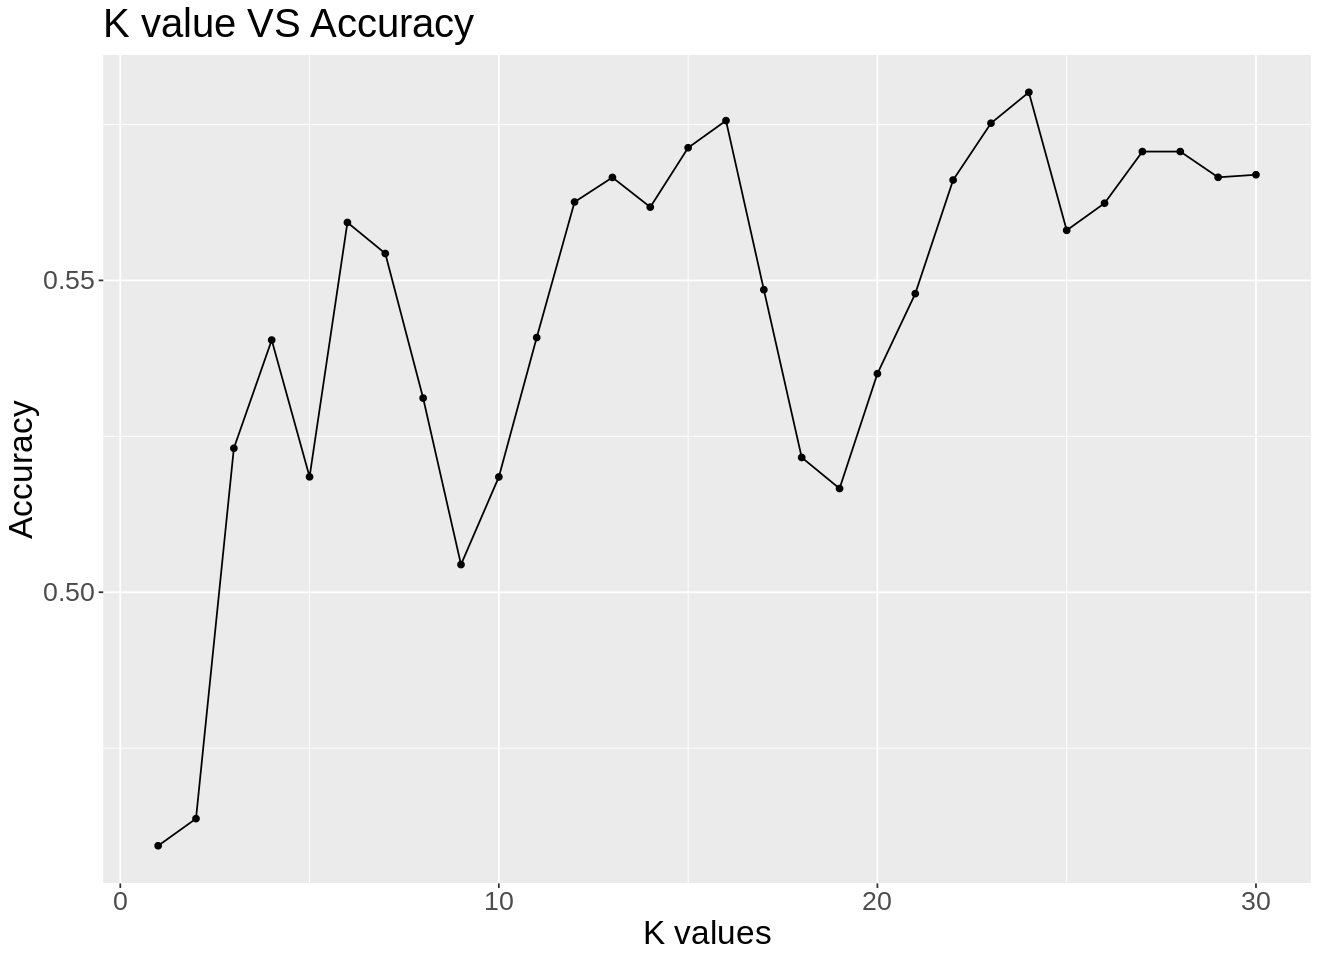

In [24]:
# To visualize and find out the optimal K value, I would make a graph using the ggplot, geom_line, geom_point function.
options(repr.plot.witdh = 7, repr.plot.height = 8)
knn_plot <- knn_optimal_values |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line(aes(x = neighbors, y = mean)) +
    xlab("K values") +
    ylab("Accuracy") +
    ggtitle("K value VS Accuracy") +
    theme(text = element_text(size = 20))
knn_plot

# Well, it seem like that it is easy to find out the K value by looking at the plot. However, we know that the K value should be 6.

In [25]:
# Let's see if the plot is right
# Using the functions of arrange and desc to arrange the accuracy of the K values from high to low. 
k_best <- knn_optimal_values |> 
    arrange(desc(mean)) |>

# Using the function head() to show the line/row of data that I am interested, which is the first line
    head(1) |>

# Using the pull function to make the K value into a number, not into a dataset or dataframe so that I can use this later
# for the new K-nn specification
    pull(neighbors)
k_best

[1] 24

# Now, let's make the new K specification and testing it with the testing dataset to find the precision and recall of that best K value

In [26]:
new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_best_k <- workflow() |>
    add_recipe(heart_diagnosis_recipe) |>
    add_model(new_knn_spec) |>
    fit(cleveland_train)


heart_diagnosis_test_prediction <- predict(knn_best_k, cleveland_test) |>
                                        bind_cols(cleveland_test)
heart_diagnosis_test_prediction

heart_diagnosis_test_prediction_accuracy <- heart_diagnosis_test_prediction |>
  metrics(truth = num, estimate = .pred_class) |>
  filter(.metric == "accuracy")
heart_diagnosis_test_prediction_accuracy

.pred_class,trestbps,thalach,num
<fct>,<dbl>,<dbl>,<fct>
Moderate,160,108,Moderate
No heart disease,130,187,No heart disease
Moderate,130,142,Moderate
⋮,⋮,⋮,⋮
No heart disease,140,144,Moderate
Moderate,164,90,Life threatening
No heart disease,110,132,Moderate


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5394737


# Let's check out the precision of this model

In [27]:
heart_diagnosis_test_presicion <- heart_diagnosis_test_prediction |>
  precision(truth = num, estimate = .pred_class, event_level = "first")
heart_diagnosis_test_presicion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.3290598


# Here is the recall of this model:

In [28]:
heart_diagnosis_test_recall <- heart_diagnosis_test_prediction |>
    recall(truth = num, estimate = .pred_class, event_level = "first") 
heart_diagnosis_test_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.377872


# Discussion:

1. summarize what you found2. 
discuss whether this is what you expected to find
3. 
discuss what impact could such findings hav
4. discuss what future questions could this lead to?eto?

# References: